In [1]:
%cd F:\My_projects\Learning\Python_imageProcessing

F:\My_projects\Learning\Python_imageProcessing


f:\My_projects\Learning\Python_imageProcessing\venv3.9\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


### Discrete Fourier Transform

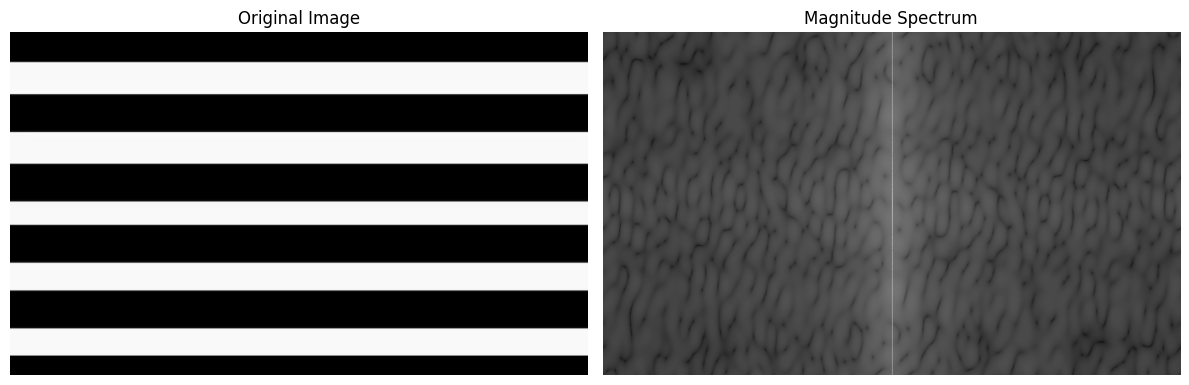

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('b2.png', cv2.IMREAD_GRAYSCALE)

# Perform the Fourier Transform
f_transform = np.fft.fft2(image) # FFT = Fast Fourier Transform

# Shift the zero frequency component (DC component) to the center
f_transform_shifted = np.fft.fftshift(f_transform)

# Compute the magnitude spectrum
magnitude_spectrum = 20 * np.log(np.abs(f_transform_shifted))

# Display the original image and its magnitude spectrum
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# high freq.

### Inverse Fourier Transform

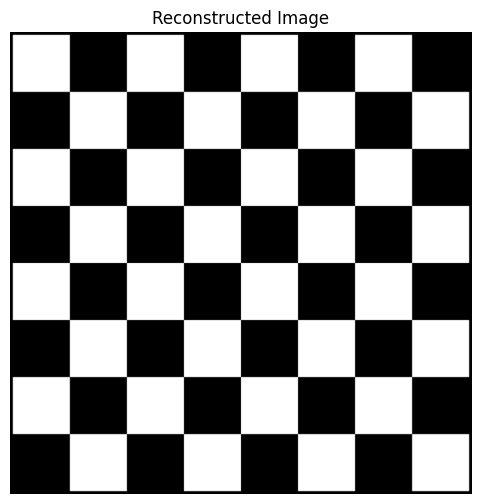

In [10]:
# Perform the inverse shift
f_transform_shifted_back = np.fft.ifftshift(f_transform_shifted)

# Perform the Inverse Fourier Transform
image_back = np.fft.ifft2(f_transform_shifted_back)

# Take the real part of the inverse transform
image_back = np.abs(image_back)

# Display the reconstructed image
plt.figure(figsize=(6, 6))
plt.imshow(image_back, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')
plt.show()


### DFT with bilateral filter

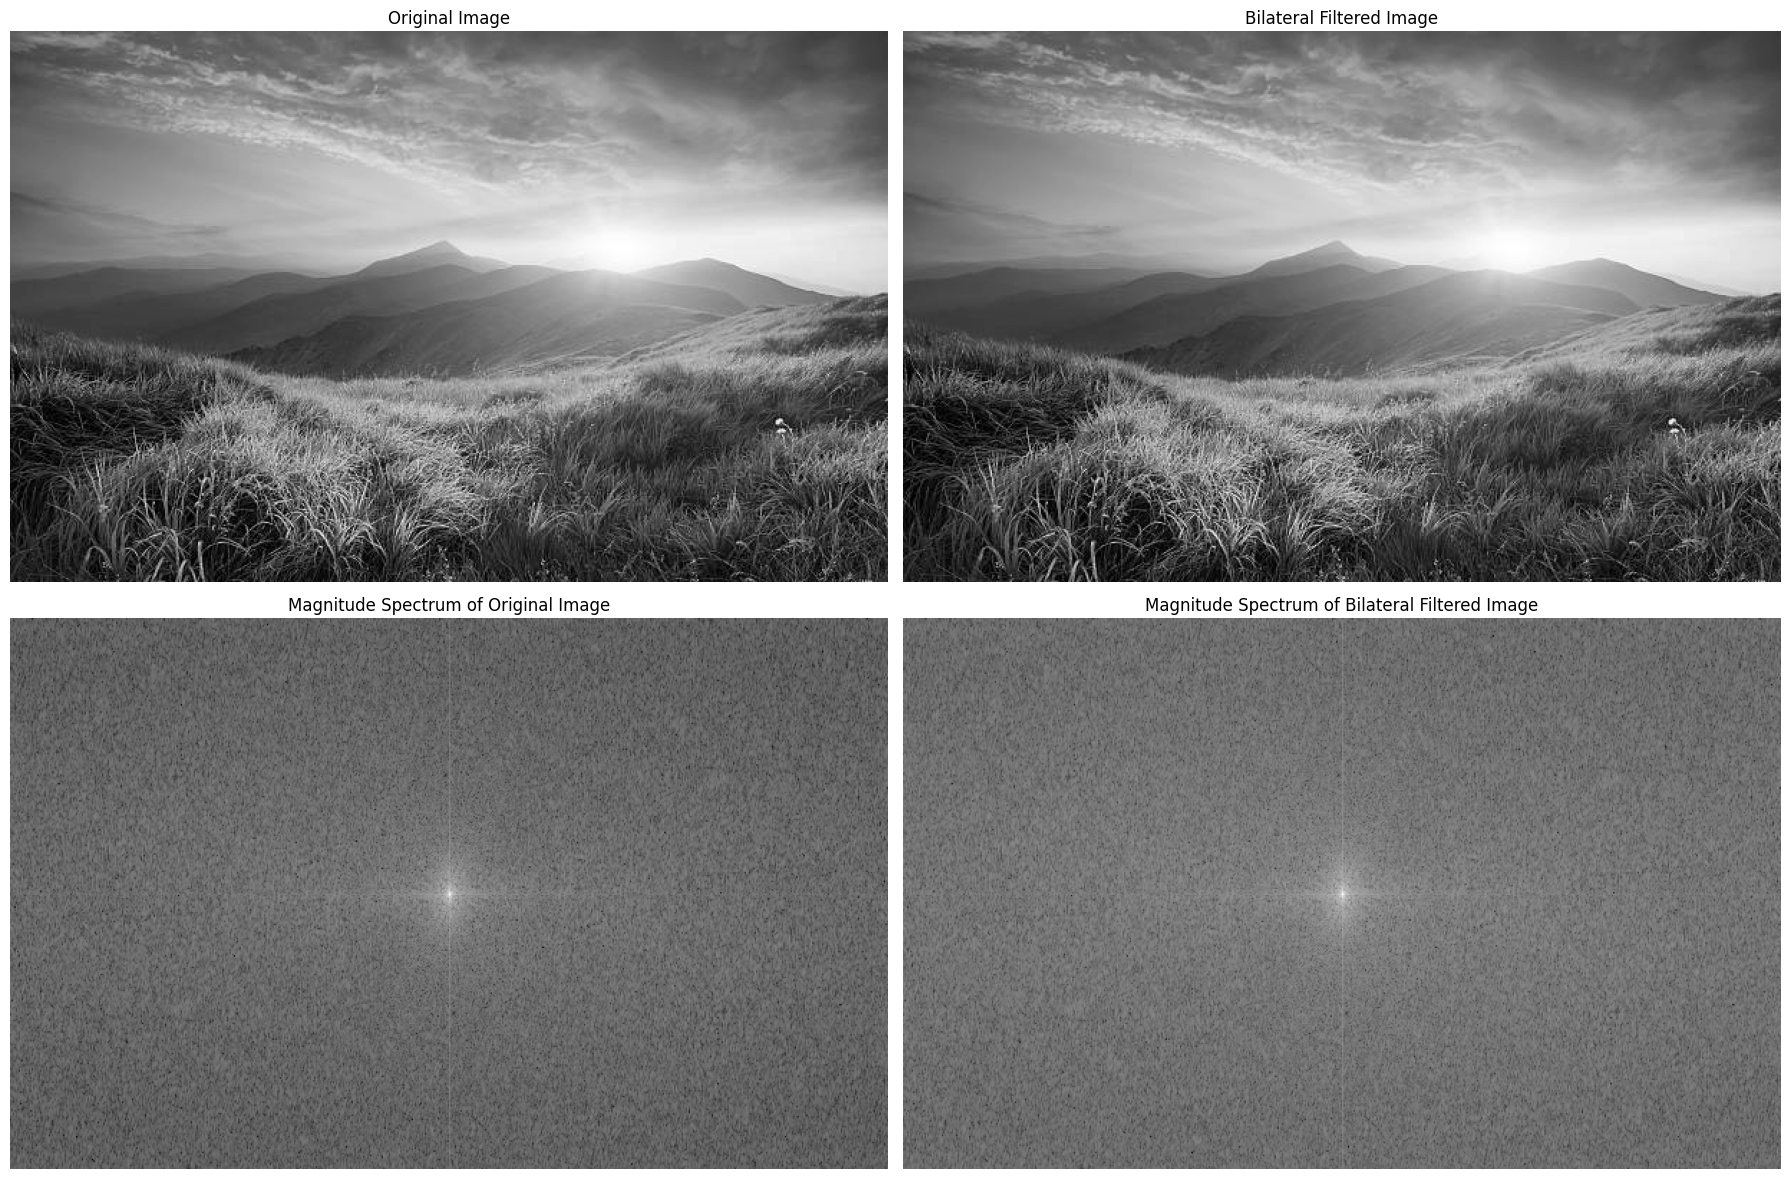

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('nature.jpg', cv2.IMREAD_GRAYSCALE)

# Apply bilateral filter
# Parameters: source image, diameter, sigmaColor, sigmaSpace
bilateral_filtered_image = cv2.bilateralFilter(image, d=9, sigmaColor=1, sigmaSpace=2)

# Perform the Fourier Transform on the original and filtered images
f_transform_original = np.fft.fft2(image)
f_transform_filtered = np.fft.fft2(bilateral_filtered_image)

# Shift the zero frequency component (DC component) to the center
f_transform_original_shifted = np.fft.fftshift(f_transform_original)
f_transform_filtered_shifted = np.fft.fftshift(f_transform_filtered)

# Compute the magnitude spectrum
magnitude_spectrum_original = 20 * np.log(np.abs(f_transform_original_shifted))
magnitude_spectrum_filtered = 20 * np.log(np.abs(f_transform_filtered_shifted))

# Display the images
plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(bilateral_filtered_image, cmap='gray')
plt.title('Bilateral Filtered Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(magnitude_spectrum_original, cmap='gray')
plt.title('Magnitude Spectrum of Original Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(magnitude_spectrum_filtered, cmap='gray')
plt.title('Magnitude Spectrum of Bilateral Filtered Image')
plt.axis('off')

plt.tight_layout()
plt.show()
